# Importing all the required libraries

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.7 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import imutils
import easyocr
from matplotlib import pyplot as plt

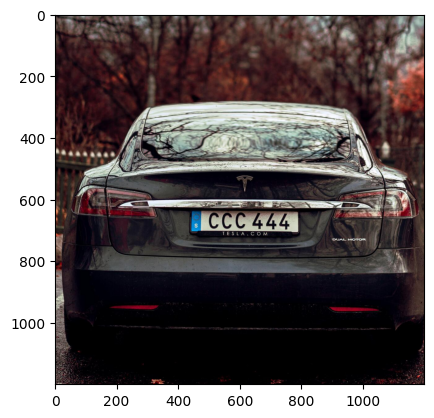

In [ ]:
#orignal image
img = cv2.imread("/content/ANPR.jpg")
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

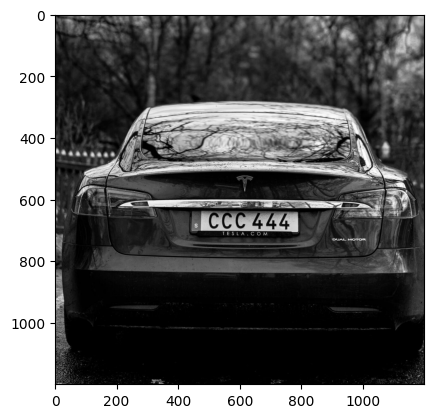

In [ ]:
#gray image
gray = cv2.imread("/content/ANPR.jpg" , cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(gray , cv2.COLOR_BGR2RGB))

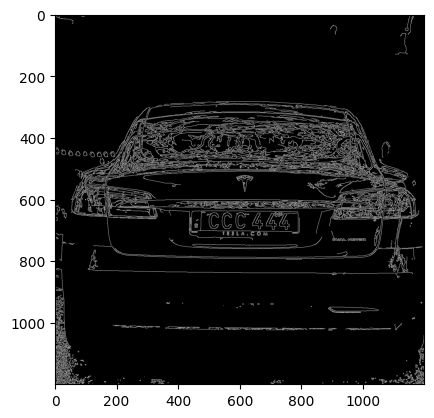

In [ ]:
#applying bilateral filter for edge detection
filter = cv2.bilateralFilter(gray, 11, 17, 17)

#applying Canny edge detector
edges = cv2.Canny(filter,30,200)

plt.imshow(cv2.cvtColor(edges , cv2.COLOR_BGR2RGB))

In [ ]:
#extracting the contours
keypoints = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours =  imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
#saving contours in a location
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour,10,True)
  if len(approx) == 4:
    location = approx
    break
location

array([[[474, 639]],

       [[784, 641]],

       [[789, 703]],

       [[473, 702]]], dtype=int32)

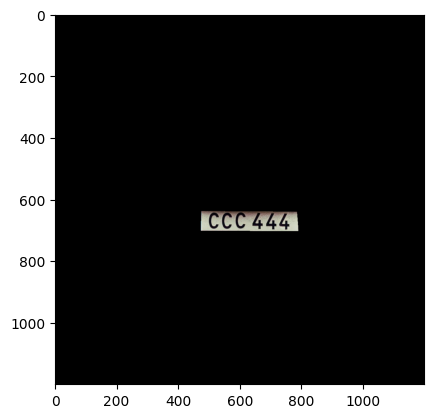

In [ ]:
#masking
value = np.uint8
mask = np.zeros(gray.shape , value)
new_img = cv2.drawContours(mask, [location] , 0 , 255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_img , cv2.COLOR_BGR2RGB))

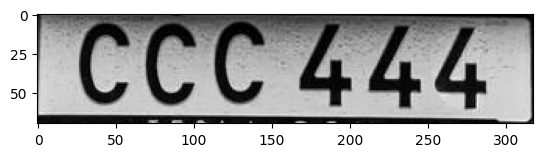

In [ ]:
# Getting the coordinates of non-zero pixels in the mask
(x,y) = np.where(mask == 255)

# Calculate the bounding box of the contour
x1, y1, w, h = cv2.boundingRect(contour)
x2 = x1 + w
y2 = y1 + h

# Cropping the region of interest from the grayscale image
cropped = gray[y1:y2, x1:x2]

plt.imshow(cv2.cvtColor(cropped , cv2.COLOR_BGR2RGB))

# Applying EasyOCR

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[18, 0], [298, 0], [298, 70], [18, 70]], 'CCC44l', 0.18468077864318824)]

# Plotting the results

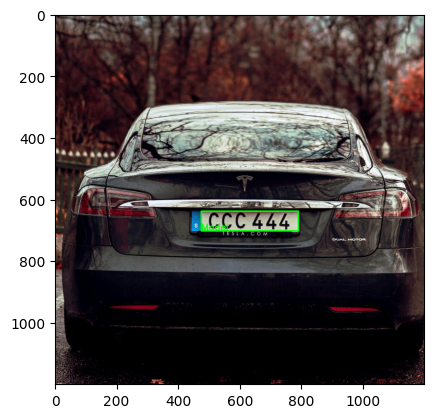

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text= "Model", org=(approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale=1, color =(0,255,0), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin=False)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))